In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam

world_cup_matches = pd.read_csv("C:\\Users\\ianfr\\Documents\\dev\\inteligencia-computacional\\dataset\\results.csv")
world_cup_matches['year'] = world_cup_matches['date'].str[:4].astype(int)
world_cup_matches = world_cup_matches[['home_team', 'home_score', 'away_score', 'away_team', 'year']]
world_cup_matches = world_cup_matches[(world_cup_matches.year) >= 1930]
world_cup_matches.head()

,home_team,home_score,away_score,away_team,year
1252,Spain,1,0,Czechoslovakia,1930
1253,Portugal,1,0,Czechoslovakia,1930
1254,Greece,2,1,Yugoslavia,1930
1255,Northern Ireland,7,0,Wales,1930
1256,Italy,4,2,Switzerland,1930


In [29]:
world_cup_matches.mean()

home_score       1.727562
away_score       1.170763
year          1992.254477
dtype: float64

C:\Users\ianfr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


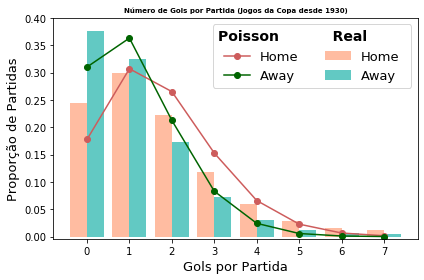

[[1.77717143e-01 3.10130182e-01]
 [3.07017396e-01 3.63088982e-01]
 [2.65195806e-01 2.12545596e-01]
 [1.52714072e-01 8.29468491e-02]
 [6.59557601e-02 2.42777782e-02]
 [2.27885340e-02 5.68470551e-03]
 [6.56143453e-03 1.10924060e-03]
 [1.61932650e-03 1.85522571e-04]]


In [51]:
poisson_pred = np.column_stack([[poisson.pmf(i, world_cup_matches.mean()[j]) for i in range(8)] for j in range(2)])

plt.hist(world_cup_matches[['home_score', 'away_score']].values, range(9),
        alpha=0.7, label=['Home', 'Away'], normed=True, color=["#FFA07A", "#20B2AA"])

pois1, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#CD5C5C')
pois2, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#006400')

leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson           Real        ", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(9)])
plt.xlabel("Gols por Partida",size=13)
plt.ylabel("Proporção de Partidas",size=13)
plt.title("Número de Gols por Partida (Jogos da Copa desde 1930)",size=7,fontweight='bold')
plt.ylim([-0.004, 0.4])
plt.tight_layout()
plt.show()
print(poisson_pred)

C:\Users\ianfr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


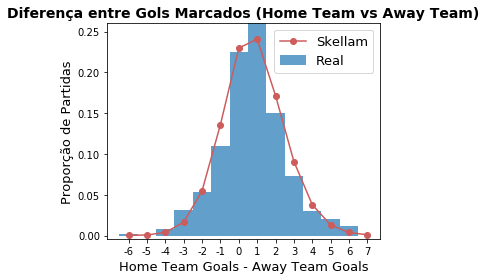

In [4]:
skellam_pred = [skellam.pmf(i,  world_cup_matches.mean()[0],  world_cup_matches.mean()[1]) for i in range(-6,8)]

plt.hist(world_cup_matches[['Home Team Goals']].values - world_cup_matches[['Away Team Goals']].values, range(-6,8), 
         alpha=0.7, label='Real',normed=True)
plt.plot([i+0.5 for i in range(-6,8)], skellam_pred,
                  linestyle='-', marker='o',label="Skellam", color = '#CD5C5C')
plt.legend(loc='upper right', fontsize=13)
plt.xticks([i+0.5 for i in range(-6,8)],[i for i in range(-6,8)])
plt.xlabel("Home Team Goals - Away Team Goals",size=13)
plt.ylabel("Proporção de Partidas",size=13)
plt.title("Diferença entre Gols Marcados (Home Team vs Away Team)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.26])
plt.tight_layout()
plt.show()

In [54]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

goal_model_data = pd.concat([world_cup_matches[['home_team','away_team','home_score']].assign(home=1).rename(
            columns={'home_team':'team', 'away_team':'opponent','home_score':'goals'}),
           world_cup_matches[['away_team','home_team','away_score']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent','away_score':'goals'})])
#print(goal_model_data)
poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                79174
Model:                            GLM   Df Residuals:                    78552
Model Family:                 Poisson   Df Model:                          621
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1765e+05
Date:                Thu, 03 Oct 2019   Deviance:                       98417.
Time:                        22:32:47   Pearson chi2:                 9.22e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.5580      0.260     -2.145      0.032      -1.068      -0.048
team[T.Afghanistan]                             -0.3056      0.209     -1.465      0.143      -0.715       0.103
team[T.Albania]                                  0.5743      0.195      2.952      0.003       0.193       0.955
team[T.Alderney]                                -1.3148      0.326     -4.031      0.000      -1.954      -0.675
team[T.Algeria]                                  0.8103      0.189      4.279      0.000       0.439       1.181
team[T.American Samoa]                          -1.5045      0.252     -5.979      0.000      -1.998      -1.011
team[T.Andalusia]                                1.1665      0.283      4.126      0.000       0.612       1.721
team[T.Andorra]                                 -0.7143      0.241     -2.960      0.003      -1.187      -0.241
team[T.Angola]                                   0.4939      0.193      2.565      0.010       0.117       0.871
team[T.Anguilla]                                -1.2133      0.255     -4.751      0.000      -1.714      -0.713
team[T.Antigua and Barbuda]                     -0.0287      0.197     -0.146      0.884      -0.415       0.358
team[T.Arameans Suryoye]                         0.1161      0.298      0.390      0.696      -0.467       0.699
team[T.Argentina]                                1.4960      0.187      7.982      0.000       1.129       1.863
team[T.Armenia]                                  0.6163      0.198      3.109      0.002       0.228       1.005
team[T.Artsakh]                                  0.3634      0.245      1.482      0.138      -0.117       0.844
team[T.Aruba]                                    0.0720      0.205      0.351      0.725      -0.330       0.474
team[T.Australia]                                0.9783      0.188      5.207      0.000       0.610       1.347
team[T.Austria]                                  1.3406      0.188      7.132      0.000       0.972       1.709
team[T.Azerbaijan]                               0.2335      0.200      1.166      0.244      -0.159       0.626
team[T.Bahamas]                                 -0.5210      0.252     -2.065      0.039      -1.015      -0.027
team[T.Bahrain]                                  0.4796      0.190      2.522      0.012       0.107       0.852
team[T.Bangladesh]                              -0.5445      0.201     -2.711      0.007      -0.938      -0.151
team[T.Barawa]                                  -0.8538      0.306     -2.787      0.005      -1.454      -0.253
team[T.Barbados]                                 0.0643      0.195      0.330      0.742      -0.318       0.446
team[T.Basque Country]          

In [64]:
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

simulate_match(poisson_model, 'Brazil', 'Argentina', max_goals=3)

array([[0.05891809, 0.05878882, 0.02932992, 0.00975519],
       [0.10804406, 0.10780701, 0.05378524, 0.01788908],
       [0.09906566, 0.09884831, 0.04931572, 0.01640251],
       [0.06055557, 0.06042271, 0.03014507, 0.01002631]])

In [65]:
simulate_match(poisson_model, 'Argentina', 'Brazil', max_goals=3)

array([[0.06665063, 0.08607521, 0.05558044, 0.02392625],
       [0.09443407, 0.12195583, 0.07874925, 0.03389995],
       [0.06689954, 0.08639668, 0.05578802, 0.02401561],
       [0.03159558, 0.04080376, 0.02634779, 0.01134219]])

In [34]:
bra_arg = simulate_match(poisson_model, 'Brazil', 'Argentina', max_goals=3)
np.sum(np.tril(bra_arg, -1))

0.45708138172158946

In [35]:
np.sum(np.diag(bra_arg))

0.2260671256873349

In [36]:
np.sum(np.triu(bra_arg, 1))

0.18595075402219588

In [45]:
brazil_home = world_cup_matches[(world_cup_matches['home_team']=='Brazil')]
brazil_away = world_cup_matches[(world_cup_matches['away_team']=='Brazil')]
brazil = world_cup_matches[(world_cup_matches['home_team']=='Brazil') | (world_cup_matches['away_team']=='Brazil')]

In [47]:
brazil_home.mean()
# brazil.mean()

home_score       2.491682
away_score       0.815157
year          1982.713494
dtype: float64

In [41]:
arg_away = world_cup_matches[(world_cup_matches['away_team']=='Argentina')]

In [42]:
arg_away.mean()

home_score       1.230978
away_score       1.429348
year          1984.491848
dtype: float64

In [43]:
arg_away.head()

,home_team,home_score,away_score,away_team,year
1319,Uruguay,4,2,Argentina,1930
1374,Paraguay,0,1,Argentina,1931
1378,Paraguay,1,1,Argentina,1931
1478,Uruguay,1,0,Argentina,1932
1538,Uruguay,2,1,Argentina,1933


In [44]:
print(world_cup_matches.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39587 entries, 1252 to 40838
Data columns (total 5 columns):
home_team     39587 non-null object
home_score    39587 non-null int64
away_score    39587 non-null int64
away_team     39587 non-null object
year          39587 non-null int32
dtypes: int32(1), int64(2), object(2)
memory usage: 1.7+ MB
None


In [21]:
len(world_cup_matches['Home Team Name'].unique().tolist())

79

In [22]:
len(world_cup_matches['Away Team Name'].unique().tolist())

84

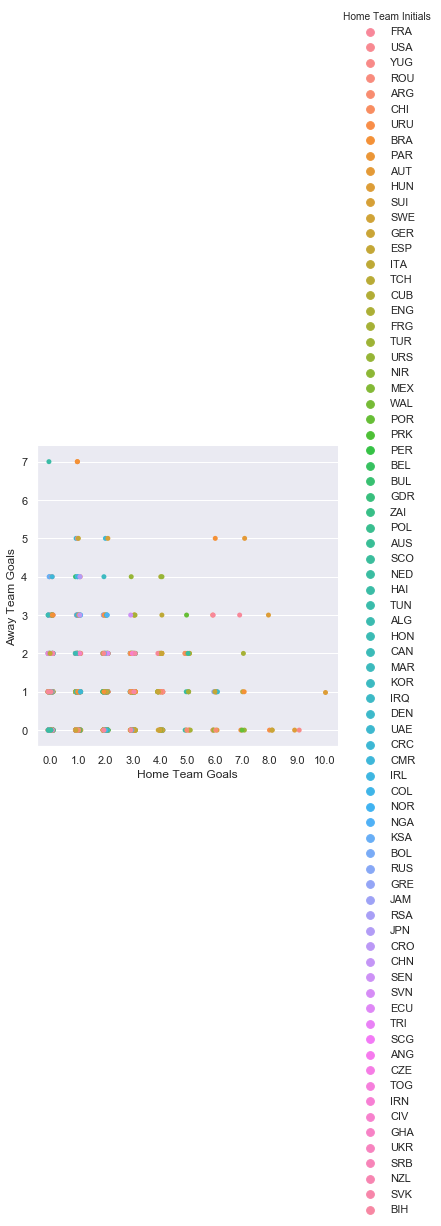

In [36]:
seaborn.set()
full = pd.read_csv("C:\\Users\\ianfr\\Documents\\dev\\inteligencia-computacional\\dataset\\WorldCupMatches.csv")
seaborn.catplot(x="Home Team Goals", y="Away Team Goals", hue="Home Team Initials",
           data=full);

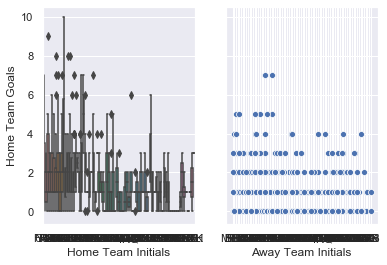

In [38]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
seaborn.boxplot(x="Home Team Initials", y="Home Team Goals", data=full, ax=axes[0])
seaborn.scatterplot(x="Away Team Initials", y="Away Team Goals", data=full, ax=axes[1]);

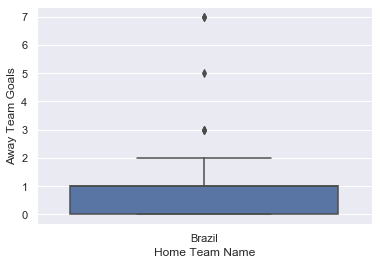

In [44]:
brazil = world_cup_matches[(world_cup_matches['Home Team Name']=='Brazil') | (world_cup_matches['Away Team Name']=='Brazil')]
seaborn.boxplot(x="Home Team Name", y="Away Team Goals", data=brazil_home)

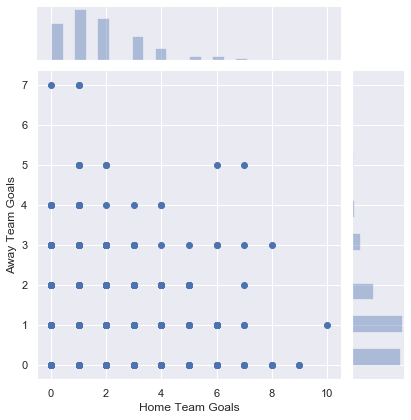

In [46]:
seaborn.jointplot(x="Home Team Goals", y="Away Team Goals", data=world_cup_matches);


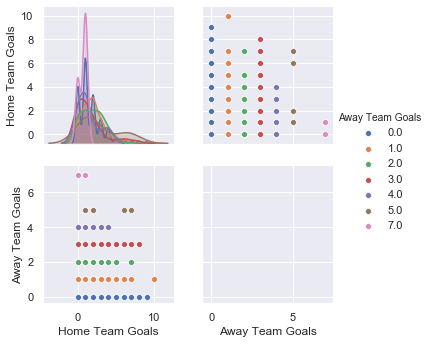

In [48]:
seaborn.pairplot(data=world_cup_matches, hue="Away Team Goals");

In [27]:
world_cup_matches.duplicated()

1252     False
1253     False
1254     False
1255     False
1256     False
1257     False
1258     False
1259     False
1260     False
1261     False
1262     False
1263     False
1264     False
1265     False
1266     False
1267     False
1268     False
1269     False
1270     False
1271     False
1272     False
1273     False
1274     False
1275     False
1276     False
1277     False
1278     False
1279     False
1280     False
1281     False
         ...  
40809    False
40810    False
40811    False
40812    False
40813    False
40814    False
40815    False
40816    False
40817    False
40818    False
40819    False
40820    False
40821    False
40822    False
40823    False
40824    False
40825    False
40826    False
40827    False
40828    False
40829    False
40830    False
40831    False
40832    False
40833    False
40834    False
40835    False
40836     True
40837    False
40838    False
Length: 39587, dtype: bool

In [49]:
world_cup_matches.drop_duplicates(keep='last',inplace=False)
world_cup_matches.tail()


,home_team,home_score,away_score,away_team,year
40834,American Samoa,8,1,Tahiti,2019
40835,Fiji,4,4,Solomon Islands,2019
40836,Senegal,0,1,Algeria,2019
40837,Tajikistan,0,1,North Korea,2019
40838,Papua New Guinea,1,1,Fiji,2019


In [62]:
world_cup_matches = pd.read_csv("C:\\Users\\ianfr\\Documents\\dev\\inteligencia-computacional\\dataset\\WorldCupMatches.csv")
world_cup_matches = world_cup_matches[['Home Team Name', 'Home Team Goals', 'Away Team Goals', 'Away Team Name']]
world_cup_matches.drop_duplicates(keep='last',inplace=True)
world_cup_matches.mean()

Home Team Goals    1.833333
Away Team Goals    1.028986
dtype: float64

C:\Users\ianfr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


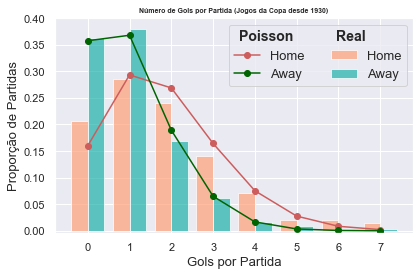

In [63]:
poisson_pred = np.column_stack([[poisson.pmf(i, world_cup_matches.mean()[j]) for i in range(8)] for j in range(2)])

plt.hist(world_cup_matches[['Home Team Goals', 'Away Team Goals']].values, range(9),
        alpha=0.7, label=['Home', 'Away'], normed=True, color=["#FFA07A", "#20B2AA"])

pois1, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#CD5C5C')
pois2, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#006400')

leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson           Real        ", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(9)])
plt.xlabel("Gols por Partida",size=13)
plt.ylabel("Proporção de Partidas",size=13)
plt.title("Número de Gols por Partida (Jogos da Copa desde 1930)",size=7,fontweight='bold')
plt.ylim([-0.004, 0.4])
plt.tight_layout()
plt.show()

C:\Users\ianfr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


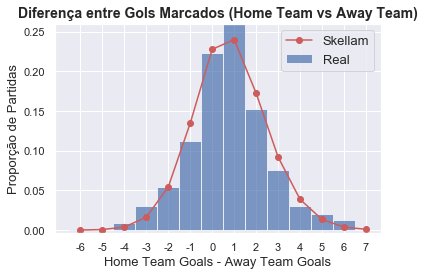

In [64]:
skellam_pred = [skellam.pmf(i,  world_cup_matches.mean()[0],  world_cup_matches.mean()[1]) for i in range(-6,8)]

plt.hist(world_cup_matches[['Home Team Goals']].values - world_cup_matches[['Away Team Goals']].values, range(-6,8), 
         alpha=0.7, label='Real',normed=True)
plt.plot([i+0.5 for i in range(-6,8)], skellam_pred,
                  linestyle='-', marker='o',label="Skellam", color = '#CD5C5C')
plt.legend(loc='upper right', fontsize=13)
plt.xticks([i+0.5 for i in range(-6,8)],[i for i in range(-6,8)])
plt.xlabel("Home Team Goals - Away Team Goals",size=13)
plt.ylabel("Proporção de Partidas",size=13)
plt.title("Diferença entre Gols Marcados (Home Team vs Away Team)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.26])
plt.tight_layout()
plt.show()

In [65]:
brazil_home = world_cup_matches[(world_cup_matches['Home Team Name']=='Brazil')]
brazil_home.mean()

Home Team Goals    2.256410
Away Team Goals    0.846154
dtype: float64

In [66]:
arg_away = world_cup_matches[(world_cup_matches['Away Team Name']=='Argentina')]
arg_away.mean()

Home Team Goals    1.695652
Away Team Goals    0.913043
dtype: float64

In [50]:
world_cup_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39587 entries, 1252 to 40838
Data columns (total 5 columns):
home_team     39587 non-null object
home_score    39587 non-null int64
away_score    39587 non-null int64
away_team     39587 non-null object
year          39587 non-null int32
dtypes: int32(1), int64(2), object(2)
memory usage: 1.7+ MB


In [68]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

goal_model_data = pd.concat([world_cup_matches[['Home Team Name','Away Team Name','Home Team Goals']].assign(home=1).rename(
            columns={'Home Team Name':'team', 'Away Team Name':'opponent','Home Team Goals':'goals'}),
           world_cup_matches[['Away Team Name','Home Team Name','Away Team Goals']].assign(home=0).rename(
            columns={'Away Team Name':'team', 'Home Team Name':'opponent','Away Team Goals':'goals'})])

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                 1656
Model:                            GLM   Df Residuals:                     1490
Model Family:                 Poisson   Df Model:                          165
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2367.7
Date:                Tue, 10 Sep 2019   Deviance:                       1804.0
Time:                        22:35:42   Pearson chi2:                 1.61e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -0.2656      0.368     -0.721      0.471      -0.987       0.456
team[T.Angola]                            -1.0639      1.048     -1.015      0.310      -3.118       0.990
team[T.Argentina]                          0.4383      0.299      1.467      0.143      -0.147       1.024
team[T.Australia]                          0.0865      0.419      0.206      0.836      -0.735       0.908
team[T.Austria]                            0.5621      0.323      1.742      0.082      -0.070       1.194
team[T.Belgium]                            0.2340      0.317      0.739      0.460      -0.387       0.855
team[T.Bolivia]                           -1.5390      1.040     -1.479      0.139      -3.578       0.500
team[T.Brazil]                             0.7122      0.293      2.434      0.015       0.139       1.286
team[T.Bulgaria]                          -0.0338      0.357     -0.095      0.925      -0.734       0.667
team[T.Cameroon]                          -0.1467      0.370     -0.397      0.692      -0.872       0.578
team[T.Canada]                           -22.1607   2.45e+04     -0.001      0.999   -4.81e+04    4.81e+04
team[T.Chile]                              0.3036      0.326      0.930      0.352      -0.336       0.943
team[T.China PR]                         -22.1499   2.42e+04     -0.001      0.999   -4.75e+04    4.75e+04
team[T.Colombia]                           0.4018      0.350      1.147      0.251      -0.285       1.088
team[T.Costa Rica]                         0.2308      0.379      0.610      0.542      -0.511       0.973
team[T.Croatia]                            0.3865      0.365      1.060      0.289      -0.328       1.101
team[T.Cuba]                               0.4365      0.550      0.794      0.427      -0.641       1.514
team[T.Czech Republic]                     0.0293      0.652      0.045      0.964      -1.249       1.307
team[T.Czechoslovakia]                     0.5670      0.322      1.759      0.079      -0.065       1.199
team[T.C�te d'Ivoire]                      0.2629      0.411      0.639      0.523      -0.543       1.069
team[T.Denmark]                            0.6180      0.347      1.783      0.075      -0.061       1.298
team[T.Dutch East Indies]                -22.3520   4.29e+04     -0.001      1.000   -8.42e+04    8.41e+04
team[T.Ecuador]                            0.1989      0.429      0.464      0.643      -0.642       1.040
team[T.Egypt]                              0.1964      0.650      0.302      0.763      -1.078       1.471
team[T.El Salvador]                       -1.5961      1.042     -1.532      0.125      -3.638       0.445
team[T.England]                            0.3009      0.306      0.984      0.325     

In [69]:
simulate_match(poisson_model, 'Brazil', 'Argentina', max_goals=3)

array([[0.05551415, 0.05079757, 0.02324086, 0.00708876],
       [0.10970035, 0.10038002, 0.04592578, 0.01400795],
       [0.10838829, 0.09917943, 0.04537648, 0.01384041],
       [0.07139461, 0.0653288 , 0.02988917, 0.00911658]])

In [70]:
brazil_home.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 11 to 850
Data columns (total 4 columns):
Home Team Name     78 non-null object
Home Team Goals    78 non-null float64
Away Team Goals    78 non-null float64
Away Team Name     78 non-null object
dtypes: float64(2), object(2)
memory usage: 3.0+ KB


In [71]:
brazil_away = world_cup_matches[(world_cup_matches['Away Team Name']=='Brazil')]

In [72]:
brazil_away.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 2 to 806
Data columns (total 4 columns):
Home Team Name     26 non-null object
Home Team Goals    26 non-null float64
Away Team Goals    26 non-null float64
Away Team Name     26 non-null object
dtypes: float64(2), object(2)
memory usage: 1.0+ KB


In [74]:
world_cup_matches[['Home Team Goals', 'Away Team Goals']].mean()

Home Team Goals    1.833333
Away Team Goals    1.028986
dtype: float64

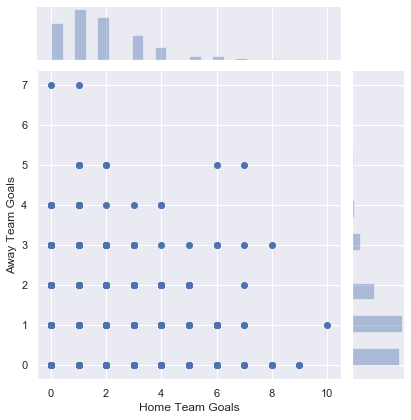

In [75]:
seaborn.jointplot(x="Home Team Goals", y="Away Team Goals", data=world_cup_matches);


In [67]:
print(world_cup_matches['home_team'].unique().tolist())

['Spain', 'Portugal', 'Greece', 'Northern Ireland', 'Italy', 'Kenya', 'Scotland', 'Germany', 'Czechoslovakia', 'France', 'England', 'Netherlands', 'Switzerland', 'Yugoslavia', 'Curaçao', 'Uganda', 'Belgium', 'Hungary', 'Austria', 'Argentina', 'Romania', 'China PR', 'Japan', 'Norway', 'Catalonia', 'Bulgaria', 'Sweden', 'Finland', 'Denmark', 'Estonia', 'Brazil', 'Peru', 'Chile', 'Bolivia', 'Paraguay', 'Uruguay', 'Latvia', 'Lithuania', 'Poland', 'Wales', 'Basque Country', 'Barbados', 'Guyana', 'Turkey', 'Republic of Ireland', 'Egypt', 'Haiti', 'Dominica', 'Australia', 'Silesia', 'Aruba', 'Trinidad and Tobago', 'Mexico', 'Luxembourg', 'Guadeloupe', 'Israel', 'Philippines', 'Suriname', 'United States', 'Jamaica', 'French Guiana', 'New Zealand', 'El Salvador', 'Cuba', 'Colombia', 'Ecuador', 'Saint Kitts and Nevis', 'Brittany', 'Panama', 'Slovakia', 'Manchukuo', 'Croatia', 'Costa Rica', 'Nicaragua', 'Afghanistan', 'India', 'Martinique', 'Guatemala', 'Honduras', 'Zimbabwe', 'Iceland', 'Albania